# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
print(df.head())

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0


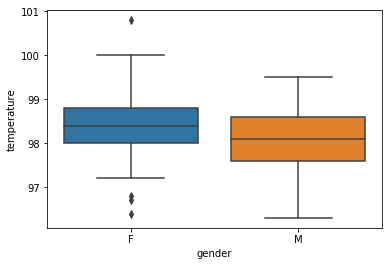

In [3]:
# Since a lot of statistical test requires that data is always normally distributed, it is therefore a necessity to always 
# check if the distribution is normally distributed or not.
# Checking if the data is normally distributed can be done by visualizing the data or by doing necessary tests
# Using a Box plot to visualize if it's normally distributed or not.
_ = sns.boxplot(x = 'gender', y ='temperature', data=df)
plt.show()
# Since the box plot is symmetrical with mean and median valueas equal, it therefore shows that the temperature 
# with some female tempertures being outliers, this makes the temperature normally distributed.

In [5]:
# Here the Null hypothesis is that the data is normally distributed and the alternative hypothesis is that the 
# data is not normally distributed.
# Normality test on temperature 
print('Mean of temperature column is: ', df['temperature'].mean())
print('Standard deviation of temperature column is:', df['temperature'].std())

Mean of temperature column is:  98.24923076923078
Standard deviation of temperature column is: 0.7331831580389454


In [6]:
# Using the Shapiro-Wilk Test to test for normality.
# If the p_value>0.05, the null hypothesis is correct but if p_value<0.05, the null value is rejected meaning the data is 
# not normally distributed.
from scipy import stats
stats.shapiro(df['temperature'])

# From the output, the test statistics is 0.99 and the p_value is 0.23 
# Since the p_value> 0.05, the distribution is therefore normally distributed meaning further statistical tests can be performed.

(0.9865769743919373, 0.2331680953502655)

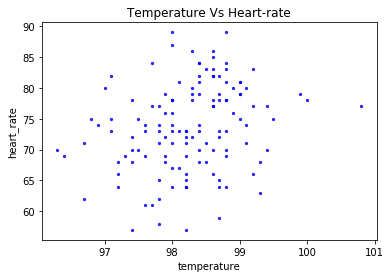

In [7]:
# The sample size is large as there are 130 observations.
# To know if the observations are dependent or independent,  a line plot showing the relationship between 

df.plot.scatter('temperature','heart_rate',  marker='.', c='blue', alpha=0.8)
plt.title('Temperature Vs Heart-rate')
plt.show()
# From this scatter plot, temperature increase increases the heart-rates 
# Most of the heart-rate values are concentrated at 70 to 85 and these values are achieved at the temperature range of 98 to 99 degree Farenheit
#  This therefore shows that the two features are dependent as an increase in temperature causes increase in heart-rate

In [9]:
# One sample test is suitable as the test is performed only on one feature which is the temperature.
# since the number of observations is greater than 50, the Z-score is therefore most suitable 

# Boostrap hypothesis testing
# step by step
# Stating the null and alternative hypothesis
# Ho: mean = 98.6
# Ha: mean <> 98.6
# significancce level is 5%
# test statistics is the sample mean which is 98.25
tmean = df['temperature'].mean()

# subtract this mean from each temperature value and add the null hypothesis value
df['mean subtract'] = df['temperature'] - tmean + 98.6
mean2 = df['mean subtract'].mean()
print('The new mean is ', mean2)

The new mean is  98.59999999999992


mean of replicates is 98.60138999999998


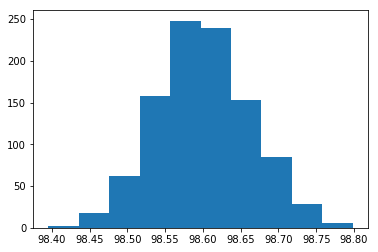

In [11]:
# select observations at random 100 times from sample
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

# Bootstrap replicate function 
def draw_bs_reps(data, func, size=1):
    # bs_replicates an array of replicates
    bs_replicates = np.empty(size)

    # loop to generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates
# Take bootstrap replicates of temp translated impact 
bs_replicates = draw_bs_reps(df['mean subtract'], np.mean, 1000)
plt.hist(bs_replicates)
print('mean of replicates is', bs_replicates.mean())     # which is still same as the hypothesis testing value.

In [15]:
# Compute fraction of replicates that are less than the 
p = np.sum(bs_replicates <= np.mean(bs_replicates)) / 1000

# Print the p-value
print('p_value= ', "%0.4f" % (p))
# Boostrap hypothesis test therefore shows that the mean 98.6 which is
# the hypothesis test is correct since the p value is greater than 0.05.

p_value=  0.5110


In [17]:
# Frequentiest statistical testing

In [ ]:
# t-test
#t, pVal = stats.ttest_1samp(df['temperature'], 98.6)
#print(t, pVal)